## Module submission header
### Submission preparation instructions 
_Completion of this header is mandatory, subject to a 2-point deduction to the assignment._ Only add plain text in the designated areas, i.e., replacing the relevant 'NA's. You must fill out all group member Names and Drexel email addresses in the below markdown list, under header __Module submission group__. It is required to fill out descriptive notes pertaining to any tutoring support received in the completion of this submission under the __Additional submission comments__ section at the bottom of the header. If no tutoring support was received, leave NA in place. You may as well list other optional comments pertaining to the submission at bottom. _Any distruption of this header's formatting will make your group liable to the 2-point deduction._

### Module submission group
- Group member 1
    - Name: Greg Morgan
    - Email: gm655@drexel.edu
- Group member 2
    - Name: Trev Pawlewicz
    - Email: tmp365@drexel.edu
- Group member 3
    - Name: Harsh Bolakani
    - Email: hvb36@drexel.edu

### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

# Project - Heart Health Analysis

## Part A: Exploratory Data Analysis

In this section, we will be doing EDA on the data set chosen for our project (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) 
This data set includes a patient's medical data(resting hr, cholestorl levels, blood preseesion, blood sugar levels etc). Our Goal in this section is to determine factors that contribute to heart fialure and find correlatiaon of various factors

__A1.__ Load the csv data into a pandas data frame

In [8]:
#imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
import numpy.matlib
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [1]:

def load_data(path_to_csv):
    
    df = pd.read_csv(path_to_csv, sep = ",", header =0)
    
    return df


In [31]:
# A1:SanityCheck

# Load the data using our function
medical_data = load_data('heart.csv')
medical_data = pd.get_dummies(medical_data)

print(medical_data.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_

__A1(Data Summary)__. Let us look at some high level information abut the data. Data information, Total rows, Total number of Girls and Boys etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

<AxesSubplot:>

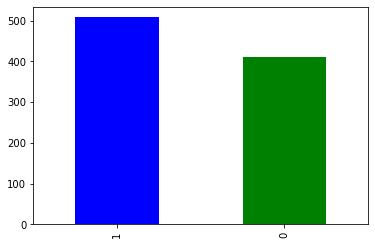

In [33]:
print(medical_data.info())
medical_data["HeartDisease"].value_counts().plot(kind="bar", color=["blue","green"])

__A2__. We will now look at the correlation matrix and find which features correlate with the target value(HeartDisease)

<AxesSubplot:title={'center':'correlation with heart disease'}>

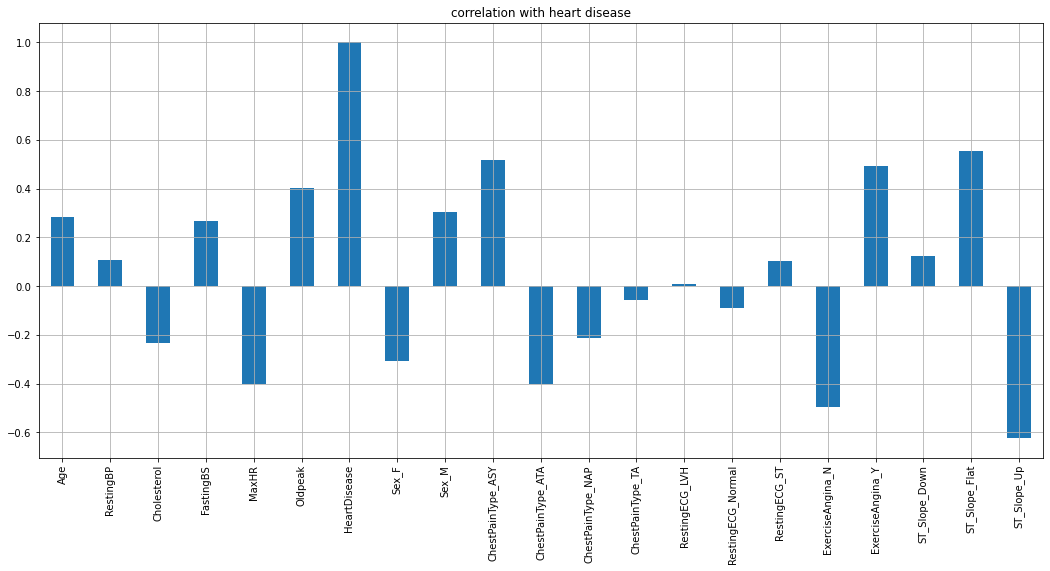

In [16]:
data_corr = medical_data.corr()
medical_data.corrwith(medical_data["HeartDisease"]).plot(kind='bar', grid=True, figsize=(18,8),title="correlation with heart disease")

__A3__. Next we will train a neural network to train a clasasification model

### EDA Summary
As part of preprocessing, clean up and EDA, we standardixed the data, ensured that there is no class imbalance and converted categorical features to numeircal features. As part of correlation analysis, we found that heart disease had maximum (negative) correlation with ST_Slope value as up and positive correlation with ExerciseAngina  = Y and with ST_Slope value as flat.

### Experiment
In our experiment, we chose the pytorch library to build a neural network for this classification task. The motivation was to use an available deep learning library that provides various optmizers and loss functions and an easy way to tune hyperparamters so we can arrive at the most accurate network.
In this experiment we found that a neural network with 2 layers performed best with our data set of heart data. we ran the experiment with 8 -14 neurons in the first layer and 2 neurons in the final layer with the leakyrelu activation to predict the chances of heart failure.

### Observation
We were able to achieve a top accuracy of 86% over the test data with 12 neurons in the first layer and with optimizer set as RMSProp.

In [11]:
!pip3 install torch torchvision

     |████████████████████████████████| 143.1 MB 8.2 MB/s eta 0:00:011
     |████████████████████████████████| 1.5 MB 20.4 MB/s eta 0:00:01


In [71]:
import torch

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = [0 if label == 0 else 1 for label in df['HeartDisease']]
        normalized_df=(df-df.mean())/df.std()
        self.features = normalized_df.drop(columns=['HeartDisease'], axis=1).values.tolist()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_features(self, idx):
        return np.array(self.features[idx])

    def __getitem__(self, idx):
        batch_features = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_features, batch_y

In [72]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X.float())
        loss = loss_fn(pred, y.long())

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y.long()).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [75]:
# Train a Neural network -------(inprogress)

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Build neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 2),
            nn.LeakyReLU()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
print(model.parameters())

learning_rate = 1e-3
batch_size = 2
epochs = 10

train_data, val_data = train_test_split(medical_data, test_size = 0.2, random_state = 0)
train, val = Dataset(train_data), Dataset(val_data)

train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(val, batch_size=batch_size)



loss_fn = nn.CrossEntropyLoss()

#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

print(model)

<generator object Module.parameters at 0x7ff3f3ebff20>
Epoch 1
-------------------------------
loss: 0.663512  [    2/  734]
loss: 0.597516  [  202/  734]
loss: 0.692945  [  402/  734]
loss: 0.418698  [  602/  734]
Test Error: 
 Accuracy: 58.2%, Avg loss: 0.510340 

Epoch 2
-------------------------------
loss: 1.011944  [    2/  734]
loss: 0.364912  [  202/  734]
loss: 0.820508  [  402/  734]
loss: 0.483407  [  602/  734]
Test Error: 
 Accuracy: 67.4%, Avg loss: 0.492608 

Epoch 3
-------------------------------
loss: 0.816077  [    2/  734]
loss: 0.304456  [  202/  734]
loss: 0.756196  [  402/  734]
loss: 0.356051  [  602/  734]
Test Error: 
 Accuracy: 71.7%, Avg loss: 0.482302 

Epoch 4
-------------------------------
loss: 0.576730  [    2/  734]
loss: 0.693096  [  202/  734]
loss: 0.397371  [  402/  734]
loss: 0.477097  [  602/  734]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.408335 

Epoch 5
-------------------------------
loss: 0.054045  [    2/  734]
loss: 1.572706  [  202/  73

__A3(Summary).__ 